### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [73]:
data = pd.read_csv('data/coupons.csv')
#data = org_data.copy()

In [75]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [77]:
# Info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [79]:
# Missing value
missing_rows = data.isnull().sum()
missing_rows

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [81]:
# Duplicate values
data.duplicated().value_counts()
# Drop duplicated records
data = data.drop_duplicates()

In [83]:
# Drop 'Car' column in-place. higher % of data missing which won't contribute to the problem statement 
# if driver redeem the coupon or not.  
data.drop('car', axis=1, inplace=True)

#Rest all the data have very small % of missing values and will keep as NaN as seperated category to 
# avoid lossing other relevant data

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12503 non-null  object
 15  CoffeeHouse           12393 non-null  obj

In [87]:
# Get all the unique values for all the columns with null value 
missing_rows_columns = missing_rows[missing_rows > 0 ].index
print(missing_rows_columns)

Index(['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')


In [89]:
# Get all the unique values for all the columns with null value 
missing_rows_columns = missing_rows[missing_rows > 0 ].index
print(missing_rows_columns)

Index(['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')


In [91]:
#Get Unique values for all the Object column
print(data["age"].unique())
print(data["expiration"].unique())

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['1d' '2h']


In [93]:
#Dictionary of all the unique values corresponding to each object columns
object_cols = data.select_dtypes(include='object').columns
unique_values = {}
for col in object_cols:
    unique_values[col] = data[col].unique()
unique_values

{'destination': array(['No Urgent Place', 'Home', 'Work'], dtype=object),
 'passanger': array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object),
 'weather': array(['Sunny', 'Rainy', 'Snowy'], dtype=object),
 'time': array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object),
 'coupon': array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
        'Restaurant(20-50)'], dtype=object),
 'expiration': array(['1d', '2h'], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'age': array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
       dtype=object),
 'maritalStatus': array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
        'Widowed'], dtype=object),
 'education': array(['Some college - no degree', 'Bachelors degree',
        'Associates degree', 'High School Graduate',
        'Graduate degree (Masters or Doctorate)', 'Some High School'],
       dtype=object),
 'occupation': array(['Unemployed', 'Architecture &

In [95]:
# Ordered categories for column 'time' and replace column with values category code
time_ord = ['7AM','10AM','2PM','6PM',  '10PM']
data['time'] = data['time'].astype('category').cat.set_categories(time_ord).cat.codes

# Ordered categories for column 'expiration' and replace column values with category code
expiration_ord = ['2h', '1d']
data['expiration'] = data['expiration'].astype('category').cat.set_categories(expiration_ord).cat.codes

# Ordered categories for column 'age' and replace column values with category code
age_ord = ['below21','21','26','31','36','41','46','50plus']
age_cat = data['age'].astype('category')
data['age'] = age_cat.cat.set_categories(age_ord).cat.codes

# Ordered categories for column 'income'
income_ord = ['Less than $12500', '$12500 - $24999', '$25000 - $37499',
                 '$37500 - $49999','$50000 - $62499', '$62500 - $74999', 
                 '$75000 - $87499', '$87500 - $99999', '$100000 or More']
data['income'] = data['income'].astype('category').cat.set_categories(income_ord).cat.codes

# Ordered categories for visit frequencies
visit_ord = ['never', 'less1', '1~3', '4~8','gt8', 'nan']

# Ordered categories for bar, coffeehouse, carryaway, restaurants visits
bar_cat = data['Bar'].replace(np.NaN, 'nan').astype('category')
data['Bar'] = bar_cat.cat.set_categories(visit_ord).cat.codes

data['CoffeeHouse'] = data['CoffeeHouse'].replace(np.NaN, 'nan').astype('category') \
                                                                .cat.set_categories(visit_ord).cat.codes
data['CarryAway'] = data['CarryAway'].replace(np.NaN, 'nan').astype('category') \
                                                                .cat.set_categories(visit_ord).cat.codes
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace(np.NaN, 'nan').astype('category') \
                                                                .cat.set_categories(visit_ord).cat.codes 
data['Restaurant20To50'] = data['Restaurant20To50'].replace(np.NaN, 'nan').astype('category') \
                                                                .cat.set_categories(visit_ord).cat.codes


# Rename column names 
data = data.rename(columns={
                        "RestaurantLessThan20": "lt20",
                        "Restaurant20To50" : "b20t50",
                        "toCoupon_GEQ5min" : "close",
                        "toCoupon_GEQ15min" : "moderate",
                        "toCoupon_GEQ25min" : "far", 
                        "direction_same" : "in_route",
                        "direction_opp" : "out_of_route",
                        "Y": "redeemed"
                    })

4. What proportion of the total observations chose to accept the coupon?



In [97]:
# Number of coupon redeemed
coupon_redeemed = data['redeemed'].value_counts().to_dict().get(1)
pcnt_coupon_redeemed = coupon_redeemed/len(data) * 100
print(f"% of coupon redeemed {pcnt_coupon_redeemed:2f}")

% of coupon redeemed 56.756542


5. Use a bar plot to visualize the `coupon` column.

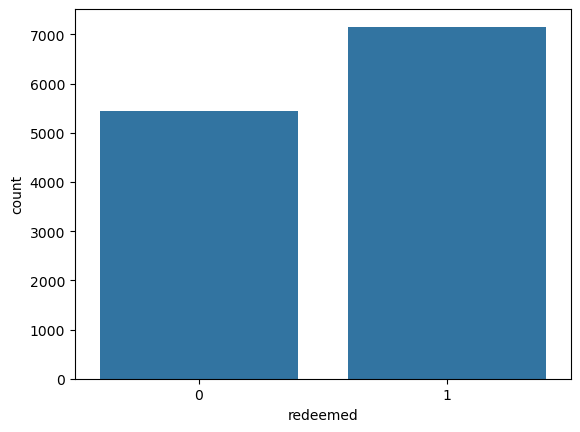

In [27]:
barplt = sns.barplot(data['redeemed'].value_counts(), legend='auto')

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

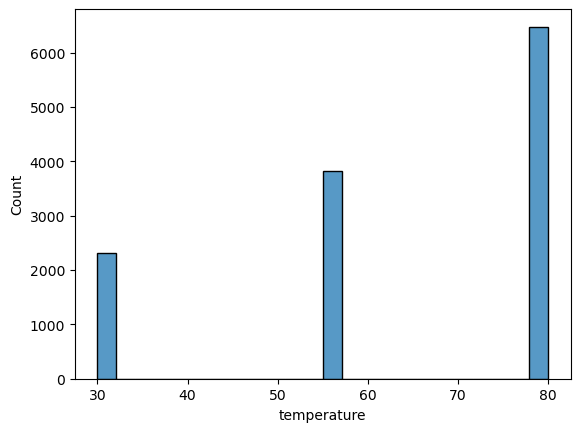

In [99]:
sns.histplot(data= data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [101]:
total_bar_coupon = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


% of bar coupon accepted 40.995025


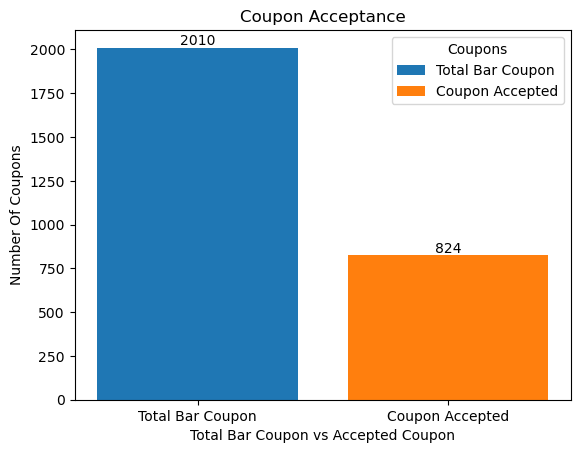

In [103]:
bar_coupon_accepted = total_bar_coupon[total_bar_coupon['redeemed'] == 1]
prnt_bar_coupon_accepted = (len(bar_coupon_accepted)/len(total_bar_coupon)) * 100
print(f"% of bar coupon accepted {prnt_bar_coupon_accepted:2f}")

bar_coupon_acc = pd.Series([len(total_bar_coupon), len(bar_coupon_accepted)], index= [0, 1] )

fig, ax = plt.subplots()
ax.bar(x= bar_coupon_acc.index, height= bar_coupon_acc.values, 
               label = ['Total Bar Coupon', 'Coupon Accepted'] , 
               tick_label = ['Total Bar Coupon','Coupon Accepted'],
               color = ['tab:blue', 'tab:orange'] )
ax.set_xlabel('Total Bar Coupon vs Accepted Coupon')
ax.set_ylabel('Number Of Coupons')
ax.set_title('Coupon Acceptance')
ax.legend(title='Coupons')

for i in range(len(bar_coupon_acc.index)):
    plt.text(i, bar_coupon_acc[i], str(bar_coupon_acc[i]), ha='center', va='bottom')

plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


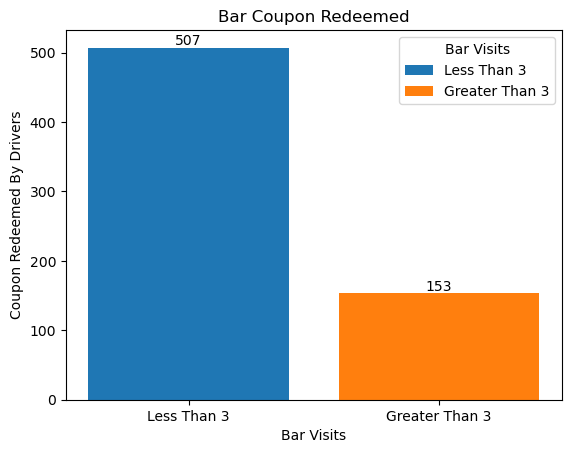

In [105]:
acc_rate_lteq3 = sum(bar_coupon_accepted[(bar_coupon_accepted['Bar'] >= 1) & (bar_coupon_accepted['Bar'] <= 2)]['Bar'].value_counts())
acc_rate_gt3 = sum( bar_coupon_accepted[(bar_coupon_accepted['Bar'] >= 3) & (bar_coupon_accepted['Bar'] <= 4) ]['Bar'].value_counts())
bar_coupon = pd.Series([acc_rate_lteq3, acc_rate_gt3], index= [0, 1] )

fig, ax = plt.subplots()
ax.bar(x= bar_coupon.index, height= bar_coupon.values, 
               label = ['Less Than 3', 'Greater Than 3'] , 
               tick_label = ['Less Than 3','Greater Than 3'],
               color = ['tab:blue', 'tab:orange'] )
ax.set_xlabel('Bar Visits')
ax.set_ylabel('Coupon Redeemed By Drivers')
ax.set_title('Bar Coupon Redeemed')
ax.legend(title='Bar Visits')

for i in range(len(bar_coupon.index)):
    plt.text(i, bar_coupon[i], str(bar_coupon[i]), ha='center', va='bottom')

plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


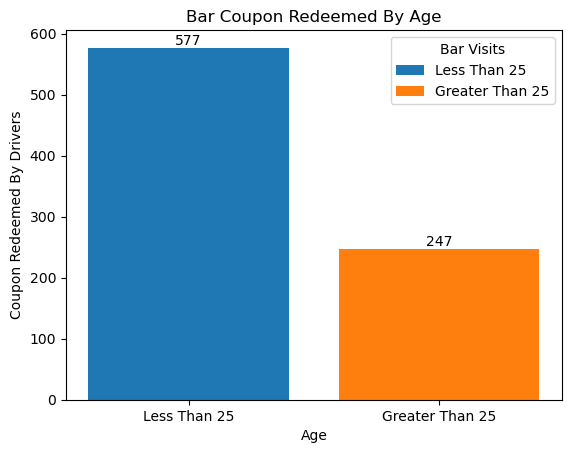

In [107]:
acc_rate_gt25 = sum(bar_coupon_accepted[(bar_coupon_accepted['age'] > 1) & (bar_coupon_accepted['age'] <= 7)]['Bar'].value_counts())
acc_rate_lt25 = len(bar_coupon_accepted) - acc_rate_gt25
bar_coupon_by_age = pd.Series([acc_rate_gt25, acc_rate_lt25], index= [0, 1] )

fig, ax = plt.subplots()
ax.bar(x= bar_coupon_by_age.index, height= bar_coupon_by_age.values, 
               label = ['Less Than 25', 'Greater Than 25'] , 
               tick_label = ['Less Than 25','Greater Than 25'],
               color = ['tab:blue', 'tab:orange'] )
ax.set_xlabel('Age')
ax.set_ylabel('Coupon Redeemed By Drivers')
ax.set_title('Bar Coupon Redeemed By Age')
ax.legend(title='Bar Visits')
for i in range(len(bar_coupon_by_age.index)):
    plt.text(i, bar_coupon_by_age[i], str(bar_coupon_by_age[i]), ha='center', va='bottom')

plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


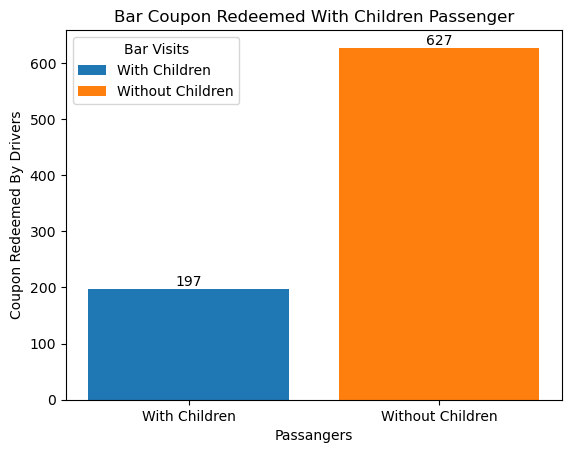

In [199]:
acc_rate_wt_noch = bar_coupon_accepted[(bar_coupon_accepted["occupation"] != 'Farming Fishing & Forestry') &
                        (bar_coupon_accepted["passanger"] != 'Kid(s)') &
                        ((bar_coupon_accepted["Bar"] > 0) & (bar_coupon_accepted["Bar"] <=4))]

acc_rate_wtch = len(bar_coupon_accepted) - acc_rate_wt_noch.shape[0]
bar_coupon_wt_child_passanger = pd.Series([acc_rate_wtch, acc_rate_wt_noch.shape[0]], index= [0, 1] )

fig, ax = plt.subplots()
ax.bar(x= bar_coupon_wt_child_passanger.index, height= bar_coupon_wt_child_passanger.values, 
               label = ['With Children', 'Without Children'] , 
               tick_label = ['With Children','Without Children'],
               color = ['tab:blue', 'tab:orange'])
ax.set_xlabel('Passangers')
ax.set_ylabel('Coupon Redeemed By Drivers')
ax.set_title('Bar Coupon Redeemed With Children Passenger')
ax.legend(title='Bar Visits')

for i in range(len(bar_coupon_wt_child_passanger.index)):
    plt.text(i, bar_coupon_wt_child_passanger[i], str(bar_coupon_wt_child_passanger[i]), ha='center', va='bottom')

plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



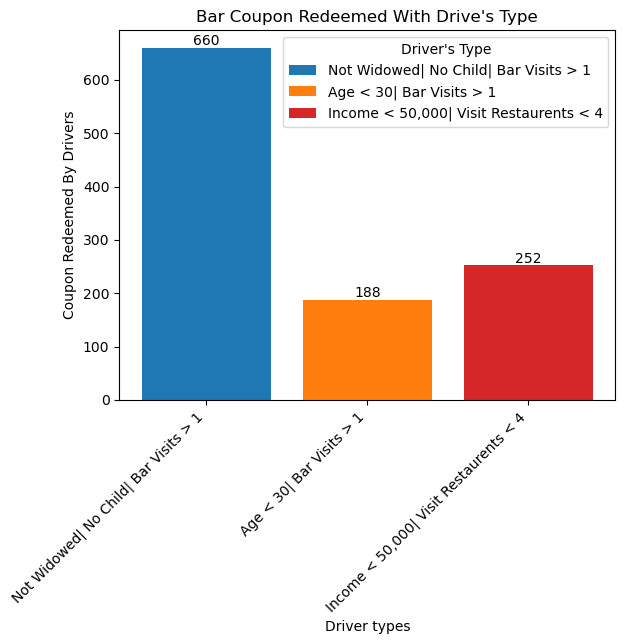

In [201]:
acc_rate_wtout_ch = bar_coupon_accepted[(bar_coupon_accepted["maritalStatus"] != 'Widowed')
                        & (bar_coupon_accepted["has_children"] != 'Kid(s)') 
                        & ((bar_coupon_accepted["Bar"] > 0) & (bar_coupon_accepted["Bar"] <=4))]

acc_rate_by_age = bar_coupon_accepted[( bar_coupon_accepted["age"] < 2 ) 
                        & ((bar_coupon_accepted["Bar"] > 0) & (bar_coupon_accepted["Bar"] <= 4))]

acc_rate_by_income = bar_coupon_accepted[ ( bar_coupon_accepted["income"] < 4 )  
                        & ((bar_coupon_accepted["lt20"] > 0) & (bar_coupon_accepted["lt20"] <= 2))]

bar_coupon_wt_passenger_types = pd.Series([acc_rate_wtout_ch.shape[0], acc_rate_by_age.shape[0], acc_rate_by_income.shape[0]],
                                                                                                                    index= [0, 1, 2] )
fig, ax = plt.subplots()
ax.bar(x= bar_coupon_wt_passenger_types.index, height= bar_coupon_wt_passenger_types.values, 
               label = ['Not Widowed| No Child| Bar Visits > 1', 'Age < 30| Bar Visits > 1', 
                                                                            'Income < 50,000| Visit Restaurents < 4'] , 
               tick_label = ['Not Widowed| No Child| Bar Visits > 1','Age < 30| Bar Visits > 1', 
                                                                            'Income < 50,000| Visit Restaurents < 4'],
               color = ['tab:blue', 'tab:orange', 'tab:red'] )
ax.set_xlabel('Driver types')
ax.set_ylabel('Coupon Redeemed By Drivers')
ax.set_title("Bar Coupon Redeemed With Drive's Type")
ax.legend(title= "Driver's Type")
plt.xticks(rotation=45, ha='right')

for i in range(len(bar_coupon_wt_passenger_types.index)):
    plt.text(i, bar_coupon_wt_passenger_types[i], str(bar_coupon_wt_passenger_types[i]), ha='center', va='bottom')

plt.show()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
1. Only 824 bar coupons has been accepted out of 2010 coupons sent to drivers
2. Most of the drivers accepted are the once who visit bars less than 3 times. 507 drivers are onces who visits 
   bars less than 3 times 'Occational Bar Visitors' and 153 who visit bars more than 3 time which can be categorized 
   'Frequent Bar Visitor'. Surprisingly, according to the data out of all coupon acceptance 156 drivers are those who 
   never visit the bar. 
3. Most of the coupon accpetance are among the population which are Less than 25 years of age drives. Out of 824
   accpeted coupons 577 are the once less than age 25 and 247's are greater than age 25. Out of 577's, 59 are the 
   drivers below the age of 21.
4. more than 10% of population redeemed coupons who driver 'alone' with bar visit 'never'
5. 627 drives accepted coupons who are driving without kids passangers 

Observation:
1. Occational Bar visitors redeemed more bar coupon than Frequent bar visitors
2. Young population age <25 redeemed coupon more than age > 25
3. Drivers who never visit bar are likely to accept the coupon
4. Drivers without children passangers are more likely to accept the coupon

Recommandations :
1. The system in-place for distributing the coupons to drive for Bar category should consider age of drivers
2. Most of the drivers in the population are driving 'alone' and 'never' visited the bar which could be detrimental
   for the drivers. Possibly, coupons with restriction of use could be good option.
   

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [131]:
# Drivers not visited bar once
population_never_visited_bar = bar_coupon_accepted[bar_coupon_accepted['Bar'] == 0 ]
len(population_never_visited_bar)

156

In [173]:
# ages of the drivers who never visited bars
df = pd.DataFrame({
                    'passanger' : population_never_visited_bar["passanger"], 
                    'age' : population_never_visited_bar["age"],
                    'destination' : population_never_visited_bar["destination"]
                })

num_by_passangers = df.groupby("passanger").count()
num_by_age = df.groupby("age").count()

print(num_by_passangers)
print(num_by_age)

           age  destination
passanger                  
Alone       94           94
Friend(s)   38           38
Kid(s)      12           12
Partner     12           12
     passanger  destination
age                        
0           26           26
1           33           33
2           22           22
3           24           24
4           17           17
5            8            8
6           10           10
7           16           16


In [193]:
bar_coupon_accepted[bar_coupon_accepted["has_children"] == 1]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,lt20,b20t50,close,moderate,far,in_route,out_of_route,redeemed
13,Home,Alone,Sunny,55,3,Bar,1,Female,1,Unmarried partner,...,0,5,3,2,1,0,0,1,0,1
75,No Urgent Place,Kid(s),Sunny,80,1,Bar,1,Male,6,Married partner,...,2,2,2,1,1,1,0,0,1,1
79,Home,Alone,Sunny,55,3,Bar,1,Male,6,Married partner,...,2,2,2,1,1,0,0,1,0,1
83,Work,Alone,Sunny,55,0,Bar,1,Male,6,Married partner,...,2,2,2,1,1,1,1,0,1,1
189,Work,Alone,Sunny,55,0,Bar,1,Female,2,Single,...,2,3,2,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12437,No Urgent Place,Kid(s),Snowy,30,3,Bar,1,Female,7,Married partner,...,1,2,2,2,1,0,0,0,1,1
12460,No Urgent Place,Friend(s),Sunny,55,4,Bar,0,Male,5,Divorced,...,1,1,2,3,1,1,0,0,1,1
12591,No Urgent Place,Friend(s),Sunny,80,4,Bar,1,Female,7,Divorced,...,1,2,2,1,1,1,0,0,1,1
12644,No Urgent Place,Friend(s),Sunny,55,4,Bar,0,Male,3,Married partner,...,0,3,4,1,1,1,0,0,1,1


In [177]:
print(data['has_children'].unique())

[1 0]
